# Reinforcement Learning <hr>

強化學習(Reinforcement Learning)是機器學習的一個分支，也稱為線上學習、評等學習。 它用於解決交互問題，在時間&ensp; $t$ &ensp;觀察到的數據被認為決定在時間&ensp; $t + 1$ &ensp;採取的行動。它也被用於人工智慧，例如最近的Alpha Go，就是透過反覆試驗學習後更新其行為準則，而作者是在章節中使用機器狗的例子。<br> 
而課程中有介紹其中兩種：<br>
+ Upper Confidence Bound (UCB)。<br>
+ Thompson Sampling。<hr>

# Multi-Armed Bandit Problem(多臂吃角子老虎問題)<Hr>
  [吃角子老虎機問題補充1](https://blog.yoctol.com/%E8%B3%AD%E5%BE%92%E7%9A%84%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A71-%E5%90%83%E8%A7%92%E5%AD%90%E8%80%81%E8%99%8E-bandit-%E5%95%8F%E9%A1%8C-62da60b58e3e)<br>
  [吃角子老虎機問題補充2](https://zhuanlan.zhihu.com/p/21388070)<br>

### <span style="color:red">情境說明</span>：有一天，當有一個賭客進入了一間賭場，想要透過吃角子老虎機以小博大，但發現在賭場中居然有一排一模一樣並且擺在一起的吃角子老虎機，他不知道應該選哪一台吃角子老虎機好，因为賭客曾聽人過有些機器中獎機率比較高，有些中獎機率比較低。那麼請問，假如賭客今天有1000塊錢，玩一次需要支付1塊錢，應該怎麼玩可以讓賭客獲得最大的收益?<br>
### <span style="color:BLUE">概念</span>：
&ensp;&ensp;因為同時有很多台吃角子老虎機供選擇，每一台機器可以得到的期望報酬&ensp;(Expected Reward，指的是玩吃角子老虎機非常多次後得到的平均報酬)&ensp;皆不一樣。站在賭客的立場，目標應該是透過對機器的選擇，從遊戲中獲得最大「期望報酬」。<br>
&ensp;&ensp;而剛開始賭客沒有任何各機器的期望報酬資訊，因此賭徒需要<span style="color:red">探勘</span> &ensp;(exploration) &ensp;各個機台報酬的可能性，也就是先試玩一段時間。在探勘累積了足夠次數，對於每台機器的期望報酬有了一定的了解之後，賭徒就可以開始進行<span style="color:red">開發</span> &ensp; (exploitation) &ensp;，不斷去玩最有潛力（期望報酬最高）的機台，獲取最大的累積報酬。<br>
(ps：被稱為<span style="color:BLUE">多臂吃角子老虎機</span> (Multi-Armed Bandit)的原因，因為吃角子老虎機的遊戲方式是拉桿，所以會將吃角子老虎機稱為臂(Arm)，指的則是很多台吃角子老虎機給玩家選擇。)

![](images/UCB1_1.PNG)
在這裡會假設報酬或是獎勵的產生方式是&ensp;<span style="color:red">隨機式</span>(stochastic bandit)&ensp;: 臂$_i$的報酬服從某種固定的機率分配$D_i$，並假設每台機器機率分配不同以及事先不知道每個機器的機率分配。

![](images/UCB1.PNG)
在此例的五台機器中，對我們最有利的是最後一台，因為他的報酬分布較高，這台機器是左偏分布，所以如果你事先知道最後一台的期望報酬最高，你就會一直玩這台機器已獲得最高的報酬，但因為你並不知道，所以你會陷入探勘&開發兩難(exploration and exploitation tradeoff)：因為探勘過多意味著不能獲得較高的收益，而開發過多意味著可能錯過更高回報的機會，所以要利用強化學習(Reinforcement Learning)來解決此問題。

課程中提到的[Paper](Using Confidence Bounds for Exploitation-Exploration Trade-offs.pdf)。<br>
![](images/UCB2.PNG)
在生活中，多臂吃角子老虎機(Multi-Armed Bandit)這個問題最常被用在廣告文案的選擇上，當有不同的活動圖片時，哪一種可以吸引較多的點擊。<br>
當然可以透過市場調查或是&ensp;$ABTest$&ensp;，了解消費者對於不同設計、顏色的想法，選出一個消費者最喜歡的作為最終呈現。然而這樣的方法有兩個問題，首先，如果每一個小設計都需要蒐集 200 份問卷，或是邀請 20 個消費者進行訪談，耗時且成本過高。此外，消費者的答案是很容易被問卷或訪談所誘導的，因此可能並不能得到真正會吸引消費者的文案。<br>
而&ensp;$ABTest$&ensp;，需要兩兩配對進行測試，所以當文案太多的時候會需要很多的樣本去證明那一種文案較佳，同樣耗時且成本過高。<br>
所以市場調查或是&ensp;$ABTest$&ensp;僅單純的用來<span style="color:red">探勘</span>&ensp;(exploration) &ensp;找出較佳的結果，而不用來&ensp;<span style="color:red">開發</span>&ensp; (exploitation) 。<Hr>


# Upper Confidence Bound (UCB)<hr>

#### 課程中彙總了多臂吃角子老虎機(Multi-Armed Bandit)的問題：(利用廣告文案當範例)
![](images/UCB3.PNG)
+ 我們有 &ensp;$D$ &ensp;個臂(Arms)，而每個臂代表我們在客戶每次連結網頁時所顯示的廣告。
+ 客戶每連結網頁一次，就當作一輪(Round)。
+ 總共執行 &ensp;$n$ &ensp;輪，在每一輪選擇一種廣告給客戶。
+ 總共執行 &ensp;$n$ &ensp;輪，在每輪選擇的廣告&ensp;$i$ &ensp;去計算每輪的報酬 &ensp;$r_i(n)\in \lbrace 0,1 \rbrace $，當 &ensp;$r_i(n)=1$ &ensp;時代表<span style="color:red">有</span>點擊該廣告 &ensp;$i$ &ensp;，當 &ensp;$r_i(n)=0$ &ensp;時代表<span style="color:red">沒有</span>點擊該廣告 &ensp;$i$。
+ 我們的目標是在執行很多輪後，可以獲得最大的報酬(最多的點擊數)。<br>

#### 在介紹完要處理的問題後，切入章節的解決方案：Upper Confidence Bound(UCB)

![](images/UCB4.PNG)
&ensp; 分成三個步驟去完成<br><br>
$Step$ &ensp;$1.$：在總共執行 &ensp;$n$ &ensp;輪中，需要先考慮第&ensp;$i$ &ensp;種廣告中的兩個數字：
1. $N_i(n)$：在總共執行 &ensp;$n$ &ensp;輪中，第&ensp;$i$ &ensp;種廣告被選中的次數。<br>
2. $R_i(n)$：在總共執行 &ensp;$n$ &ensp;輪中，第&ensp;$i$ &ensp;種廣告的總報酬數(Sum of reward)。<br><br>

$Step$ &ensp;$2.$：根據上面兩個數字去計算$\overline{r_i}(n)$和信賴區間<br>

+ 計算在總共執行 &ensp;$n$ &ensp;輪中，第&ensp;$i$ &ensp;種廣告的平均報酬&ensp;$$\overline{r_i}(n)=\frac{R_i(n)}{N_i(n)}$$<br>
+ 在總共執行 &ensp;$n$ &ensp;輪中，第&ensp;$i$ &ensp;種廣告的信賴區間<br>
$$[\overline{r_i}(n) - \Delta_i(n),\overline{r_i}(n) +\Delta_i(n)]$$<br>
$$\Delta_i(n)=\sqrt{\frac{3}{2} \cdot \frac{\log(n)}{N_i(n)}}$$<br><br>

$Step$ &ensp;$3.$：最後我們會在第 &ensp;$n$ &ensp;輪中，算出第$i$廣告的信賴區間上界(UCB)<br>

&ensp;$\overline{r_i}(n) +\Delta_i(n)$ ，並選取擁有最大信賴區間上界的那個廣告作為第&ensp;$n$ &ensp;輪所要提供的廣告。<Hr>

#### 接下來課程還是回歸吃角子老虎機的問題來進行說明
![](images/UCB1_1.PNG)
![](images/UCB1.PNG)
因為事前無法得知那一台機器的報酬分布較高，所以一開始會用相同的期望報酬進行假設，也就是紅色的虛線。
![](images/UCB5.PNG)
利用假設的期望報酬去畫出一個信賴區間，並請注意一開始要設定信賴區間的時候要設定一個很大的值來用到將真實的信賴區間上界包含進去，因為$\Delta_i(n)$會因為執行次數增加而收斂變小。
![](images/UCB6.PNG)
首先第一輪隨機挑到了第三台機器，而他沒有獲得報酬，所以平均報酬&ensp;$\overline{r_i}(n)=\frac{R_i(n)}{N_i(n)}$下降，所以信賴區間會向下移動，而因為該機器被選到了，讓$\Delta_i(n)=\sqrt{\frac{3}{2} \cdot \frac{\log(n)}{N_i(n)}}$也變小了，所以信賴區間縮小了。
![](images/UCB7.PNG)
首先第二輪隨機挑到了第四台機器，而他有獲得報酬，所以平均報酬&ensp;$\overline{r_i}(n)=\frac{R_i(n)}{N_i(n)}$上升，所以信賴區間會向上移動，而當被選到的次數越多，讓$\Delta_i(n)=\sqrt{\frac{3}{2} \cdot \frac{\log(n)}{N_i(n)}}$會變小了，所以信賴區間縮更小。
![](images/UCB8.PNG)
因為機器的報酬是機率分布的，所以也有可能在回應機率比較低的機台上有報酬產生，只能可能性較低。
![](images/UCB9.PNG)<br>
![](images/UCB10.PNG)<br>
![](images/UCB11.PNG)<hr>

## Python範例

### 分成幾個部分：<br>
#### 1. 情境說明。<br> 
#### 2. 隨機執行結果。
+ 資料預處理。<br>
+ 建立模型。<br>
+ 圖形比較。<br>

#### 3. UCB執行結果。 
+ 資料預處理。<br>
+ 建立模型。<br>
+ 圖形比較。 <br> <hr>

### <span style="color:blue">1.情境說明 </span>

<span style="color:blue">情境描述</span> ：click through rate(點擊率)CTR 優化<br>
&ensp; 去優化投放在社群網站上面給不同客戶的廣告，以提升點擊率。<br>
![](images/UCB12.PNG)<br>
&ensp;這個資料集是不同客戶對於10個不同版本的廣告是否會進行點擊的狀況，在每一次客戶在登入社群網路時，我們會放置一種版本廣告，$0$表示不會點擊該廣告，$1$表示會點擊該廣告，執行一萬個客戶。<br>
&ensp;這個部分就和前面分群的資料很類似，去觀察客戶是否會對廣告做回應，希望找出效益最高的版型(點擊率最高)，然後獲得最高的轉換率(最多用戶購買SUV)，並且因為投放廣告的預算有限，所以希望透過我們快速地找出最佳策略(哪個廣告有最高的轉換率)。<br>
&ensp;這裡的差異在於，監督式的資料集是多個X變數與一個Y變數，或是像分群這種非監督的方法只有X變數，而在強化學習中，我們是從沒有資料開始，這個資料集只是為了模擬我們呈現廣告給客戶發生的結果，因為在實務上也無法事前得知客戶對於所有的廣告的反應，而此資料集是模擬每個客戶會對哪些版本的廣告會進行點擊。<br>
&ensp;所以在UCB中，我們會先假裝沒有拿到任何的資料，然後會開始實驗放置不同的廣告版型，但不會主動去選擇或是全部隨機的投放不同版本的廣告，會有一個具體的策略去執行，而這個決策會跟每一輪執行以前的結果有關，根據其結果去<span style="color:red">動態</span>改變社群網路的廣告決策。<br>
所以我們進行&ensp;隨機的提供不同版本的廣告給客戶&ensp;以及&ensp;使用UCB演算法&ensp;兩種方式，並利用此資料集去比較兩種方式客戶點擊的成效為何。<hr>


### <span style="color:blue">2.隨機執行結果 </span>
###  資料預處理<br>
#### 載入套件&ensp;&&ensp;修改當下檔案開啟目錄&ensp;&&ensp;載入資料

In [1]:
# Random Selection

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

os.chdir("/Users/aa006/Desktop/Machine Learning A-Z Template Folder/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)")

# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

###  建立模型<br>

In [2]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward


### 在python中迴圈(for loop)&條件判斷是(if else)是利用<span style="color:red">:</span>和<span style="color:red">縮排</span>來辨識的。

In [3]:
print(total_reward)

1236


根據每一名客戶隨機選擇投放的廣告，去看這一萬名客戶的整體報酬 ，看的出來在執行了幾次後隨機的投放回應的報酬約1200人左右，並且最後用視覺化的呈現在每個版本上面被選到的次數，隨機的結果來看會接近平均選擇。

In [4]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

### <span style="color:blue">3.UCB執行結果 </span>
###  資料預處理<br>
#### 載入套件&ensp;&&ensp;修改當下檔案開啟目錄&ensp;&&ensp;載入資料

In [5]:
# Upper Confidence Bound

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
os.chdir("/Users/aa006/Desktop/Machine Learning A-Z Template Folder/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)")

# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

###  建立模型<br>

&ensp; 將語法拆成五個步驟去完成<br><br>
### $Step$ &ensp;$1.$：在總共執行 &ensp;$n$ &ensp;輪中，需要先考慮第&ensp;$i$ &ensp;種廣告中的兩個數字：
1. $N_i(n)$：在總共執行 &ensp;$n$ &ensp;輪中，第&ensp;$i$ &ensp;種廣告被選中的次數。<br>
2. $R_i(n)$：在總共執行 &ensp;$n$ &ensp;輪中，第&ensp;$i$ &ensp;種廣告的總報酬數。


In [ ]:
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d

+ 第&ensp;$i$ &ensp;種廣告被選中的次數(numbers_of_selections &ensp; $N_i(n)$) 先產生一個D行的向量(每一個值都是0)因為在第一輪時還沒有任何版本的廣告被選擇。<br>
+ 第&ensp;$i$ &ensp;種廣告的總報酬數(sums_of_rewards &ensp; $R_i(n)$)(在每輪結束後，加總廣告是否有點擊)，因為要記錄每一輪，所以一樣是向量<hr>

### $Step$ &ensp;$2.$：根據上面兩個數字去計算$\overline{r_i}(n)$和信賴區間上界<br>
+ 計算在總共執行 &ensp;$n$ &ensp;輪中，第&ensp;$i$ &ensp;種廣告的平均報酬&ensp;$$\overline{r_i}(n)=\frac{R_i(n)}{N_i(n)}$$<br>
+ 計算在總共執行 &ensp;$n$ &ensp;輪中，第&ensp;$i$ &ensp;種廣告的$\Delta_i(n)$與信賴區上界(因為在此方法中只使用上界)
$\overline{r_i}(n) +\Delta_i(n)$<br>
$$\Delta_i(n)=\sqrt{\frac{3}{2} \cdot \frac{\log(n)}{N_i(n)}}$$

In [ ]:
N = 10000
d = 10
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
for n in range(0, N):
    for i in range(0, d):
        average_reward = sums_of_rewards[i] / numbers_of_selections[i]
        delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
        upper_bound = average_reward + delta_i

### 在python中迴圈(for loop)&條件判斷是(if else)是利用<span style="color:red">:</span>和<span style="color:red">縮排</span>來辨識的。<br>
為了要計算每輪提供廣告前的每一個版型的平均報酬(average_reward)、$\Delta_i(n)$(delta_i)與信賴區間上界(upper_bound)，所以有兩層迴圈，並且設定初始參數：<br>
+ $N$(執行次數)。<br>
+ $d$(版型數量，幾種不同的比較內容)。<Br>
PS:因為python是從0開始計數，所以n要加1避免$log(0)$<hr>

### $Step$ &ensp;$3.$：在第 &ensp;$n$ &ensp;輪中，算出第$i$廣告的信賴區間上界(UCB) &ensp;$\overline{r_i}(n) +\Delta_i(n)$後，選取擁有最大信賴區間上界的那個廣告作為第&ensp;$n$ &ensp;輪所要提供的廣告。<br>

In [ ]:
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        average_reward = sums_of_rewards[i] / numbers_of_selections[i]
        delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
        upper_bound = average_reward + delta_i
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

設定初始參數：<br>
+ ads_selected(每輪中選取的廣告)，是一個很大的向量，用附加(append)的方式紀錄每輪選取的廣告。<br>
+ ad(選取的廣告)：每一輪開始時將其初始化。<Br>
+ max_upper_bound(最大上界)：在每一輪開始時將其初始化。<Br>
用if的條件從$i$等於0開始到最後，如果計算出來的上界<span style="color:red">大於</span>本輪的最大上界，就將此廣告的$i$附加進ads_selected作為該輪所選擇的廣告。<hr>

### $Step$ &ensp;$4.$：在前 &ensp;$d$ &ensp;輪中，會因為有一種廣告可能還沒被選到過，所以無法算出廣告的信賴區間上界(UCB) ，所以在前$d$輪會直接給定一個很大的數值，直到每一種廣告都至少有被選到一次。<br>
而在這個範例中，因為有10種不同的廣告，所以影片中直接用前10輪進行說明。

In [ ]:
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

用$if$的判斷句去看，當第$i$種廣告還沒有被選過時，會跳到$else$的判斷句，給定一個很大的上界，在到第二個$if$判斷劇中去執行。<br>
第一輪i=0時，因為還沒有選過所以上界會等於1e400，接下來因為目前的max_upper_bound=0，<br>
upper_bound > max_upper_bound，1e400>0，所以將執行判斷句，max_upper_bound=1e400，ad =0。<br>
第一輪i=1時，因為還沒有選過所以上界會等於1e400，接下來因為目前的max_upper_bound=1e400，<br>
upper_bound > max_upper_bound，1e400>1e400不成立，所以不執行判斷句，max_upper_bound=1e400，ad =0，
最終第一輪就選擇ad=0。<hr>

### $Step$ &ensp;$5.$：將每一輪的資料回寫。<br>

In [6]:
# Implementing UCB
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

#### 設定初始參數：<br>
+ total_reward(總報酬)，在執行了$N$次後，總共有多少次有報酬產生(點擊)。<br>

#### 再透過每一輪計算完全部$i$個廣告後:
+ 利用append將每一輪的選擇的廣告$i$寫入 ads_selected 中<br>
+ 將第&ensp;$i$ &ensp;種廣告被選中的次數(numbers_of_selections &ensp; $N_i(n)$) +1。<br>
+ 根據提供的資料集來判斷本輪的報酬(reward)結果，是否有報酬(0，1)。
+ 將第&ensp;$i$ &ensp;種廣告的總報酬數(sums_of_rewards &ensp; $R_i(n)$)+加上本輪的報酬結果。
+ 將total_reward(總報酬)+加上本輪的報酬結果。<br>


In [7]:
print(total_reward)

2178


和上面隨機挑選廣告的方式去看整體報酬，隨機的部分會落在1200上下，而UCB的模型則會到達2100，遠優於隨機挑選廣告的結果。

![](images/UCB18.PNG)<br>

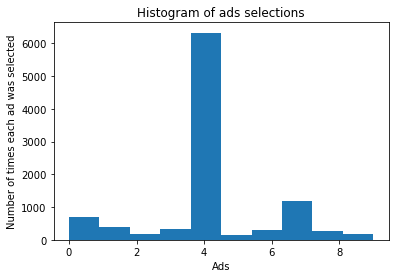

In [8]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

從此圖中可發現被選取次數最多的是廣告5。